## 1. Ensuring access to GPU

In [ ]:
!nvidia-smi

Tue Dec  3 17:11:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   29C    P0              44W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

## 2. Retrieves the current working directory and assigns it to the variable 'HOME'.

In [ ]:
import os
from google.colab import drive
HOME = os.getcwd()
print(HOME)
drive.mount('/content/drive')

/content
Mounted at /content/drive


## 3.  Set up API key for roblofow API KEY

In [ ]:
!pip install python-dotenv
from dotenv import load_dotenv

load_dotenv('/content/drive/MyDrive/Colab Notebooks/roboflow_api_secrets.env')
api_key = os.getenv('ROBOFLOW_API_KEY')

## 4. Install Ultralitycs library

In [ ]:
# Install necessary libraries
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 16.0 MB/s eta 0:00:00


## 5. Download dataset from Roboflow
Visit [How to Train YOLOv8 Object Detection on a Custom Dataset](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset/) to see how to get the following snippet.

In [ ]:
!pip install roboflow

from roboflow import Roboflow
from google.colab import userdata

rf = Roboflow(api_key=api_key)
project = rf.workspace("arab-academy-for-science-and-technology-rvgsi").project("strawberry-pen")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Strawberry-pen-1 in yolov8:: 100%|██████████| 3056/3056 [00:00<00:00, 8067.29it/s]


## 6.Training model on custom dataset

In [ ]:
%cd {HOME}

!yolo task=detect mode=train epochs=100 batch=16 plots=True \
model={HOME}/weights/yolov8n.pt \
data={HOME}/Strawberry-pen-1/data.yaml

/content
100% 6.25M/6.25M [00:00<00:00, 73.7MB/s]
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/weights/yolov8n.pt, data=/content/Strawberry-pen-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save

### 7. Saving the model

In [ ]:
import locale
import shutil
import os

# Set the locale to UTF-8
locale.setlocale(locale.LC_ALL, 'C.UTF-8')

# Define source and destination paths
source_path = '/content/runs'
destination_path = '/content/drive/MyDrive/Colab Notebooks/runsCS50'
# Ensure the destination directory exists
os.makedirs(destination_path, exist_ok=True)

# Copy the results to Google Drive
shutil.copytree(source_path, destination_path, dirs_exist_ok=True)

'/content/drive/MyDrive/Colab Notebooks/runsCS50'

## 8. Load the newly trained model

**NOTE:** We will also install two additional packages: [`roboflow`](https://github.com/roboflow/roboflow-python) to download the dataset from [Roboflow Universe](https://universe.roboflow.com/), which we will use to train our model, and [`supervision`](https://github.com/roboflow/supervision), which we will use for visualizing the results.

In [ ]:
!pip install -q supervision roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00


In [ ]:
import os
from ultralytics import YOLO
import supervision as sv

# Get the current working directory
HOME = os.getcwd()
print(HOME)

# Load the YOLOv8 model
model = YOLO(f'{HOME}/runs/detect/train4/weights/best.pt')

# Define the dataset location
dataset_location = f'{HOME}/Strawberry-pen-1'

# Load the dataset
dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset_location}/valid/images",
    annotations_directory_path=f"{dataset_location}/valid/labels",
    data_yaml_path=f"{dataset_location}/data.yaml"
)

# Create annotators
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

## 9. Select randomly an test image and visualize the result with its annotations


0: 640x640 3 ripes, 8.3ms
Speed: 2.8ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


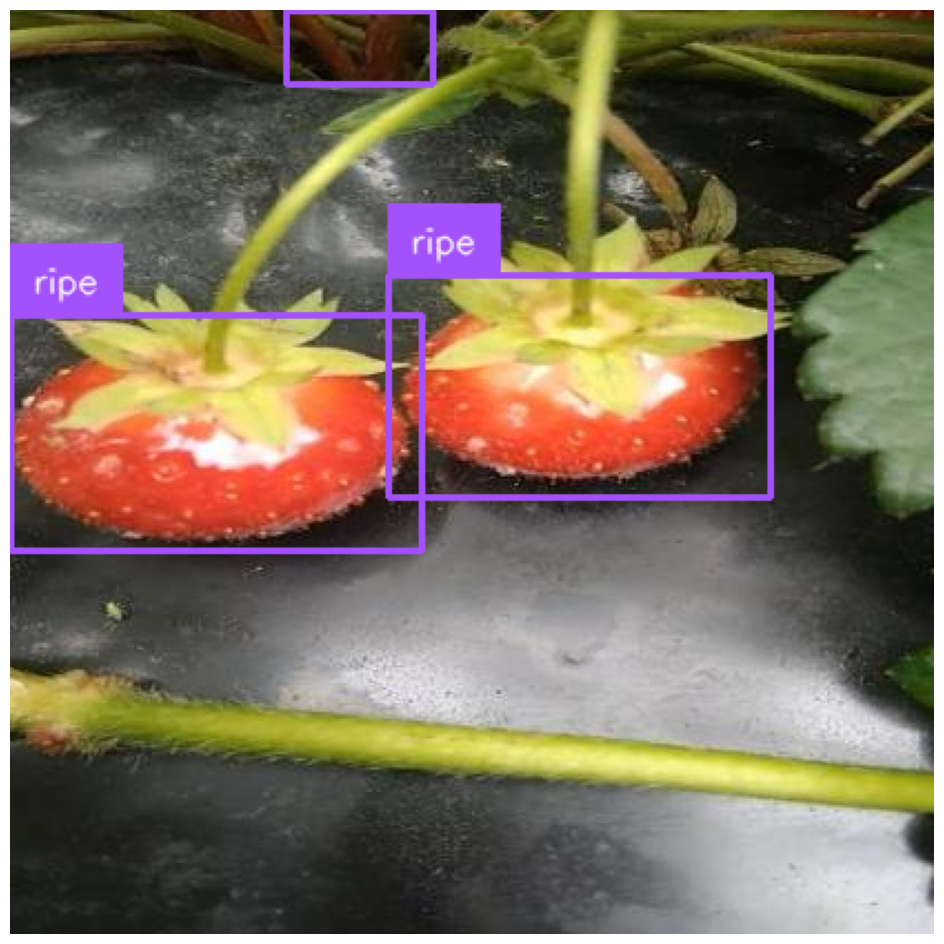

In [ ]:
# Select a random image from the dataset
random_image_path, random_image, annotation = random.choice(list(dataset))

# Make predictions
results = model(source=random_image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)

# Annotate the image
annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

# Display the annotated image
sv.plot_image(annotated_image)

This notebook was created by [Inti](https://github.com/IntiToalombo), find the complete project stuff in his repository. This notebook was used to train a model to predict if a strawberry belongs to class `ripe` either `unripe` as final project of [CS50](https://cs50.harvard.edu/x/2024/) Introduction to Computer Science Course.

Thanks to the following resources for their contribution to make this project.

* Roboflow for providing the [dataset](https://universe.roboflow.com/arab-academy-for-science-and-technology-rvgsi/strawberry-pen/dataset/1#).
* Thanks to [ultralytics](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset/) for providing tutorials and documentation.  

